## Import data and Prep for KAN Network

In [2]:
import pandas as pd
import torch
from kan import *
from kan.utils import create_dataset_from_data
import time

inputData = pd.read_csv("../mlpData.csv").drop( ["Date", "Unnamed: 0", "Target"],axis = 1)
inputData = torch.tensor(inputData.values, dtype=torch.float32)
labelData = pd.read_csv("../mlpData.csv")["Target"]

labelData = torch.tensor(labelData.values, dtype=torch.float32)
labelData = labelData.reshape(-1,1)

data = create_dataset_from_data(inputData, labelData)

## Create and fit KAN Model 

In [3]:
start = time.time()
model = KAN(width = [27,2,1], grid = 10, seed = 42)
model.fit(data, opt="LBFGS", steps=50, lamb=0.001, loss_fn = torch.nn.MSELoss())
end = time.time()
print(end-start)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.25e+03 | test_loss: 5.18e+03 | reg: 2.49e+02 | : 100%|█| 50/50 [00:23<00:00,  2.17it


saving model version 0.1
23.861685037612915


## How well did the model predict Kasillof River Salmon Inflows in 2024?

<p> Visually the KAN appears to fit the fish inflows better than the MLP</p>

Text(0, 0.5, 'Sockeye Inflow')

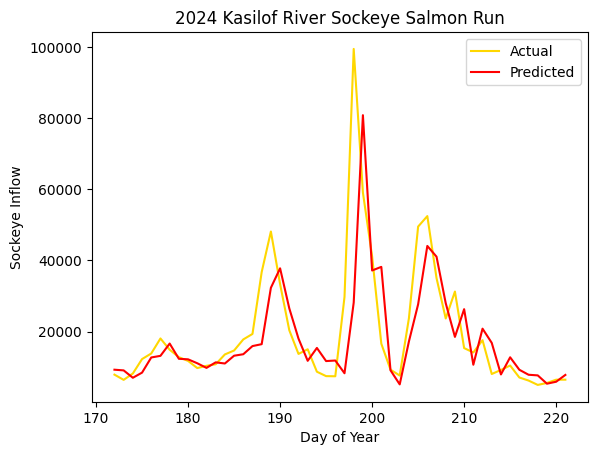

In [4]:
import matplotlib.pyplot as pyplot
from sklearn.metrics import mean_squared_error

inputData = pd.read_csv("../mlpData.csv").drop( ["Date", "Unnamed: 0", "Target"],axis = 1)
inputData = inputData[inputData["Year"] == 2024]

labelData = pd.read_csv("../mlpData.csv")
labelData = labelData[labelData["Year"] == 2024]["Target"]


predicted = model(torch.tensor(inputData.values, dtype=torch.float32))

results = pd.DataFrame({ "Actual":labelData, "Predicted":predicted.flatten().tolist() })

pyplot.plot(inputData["Day of Year"], results["Actual"], label = "Actual", color = "gold")
pyplot.plot(inputData["Day of Year"], results["Predicted"], label = "Predicted", color = "red")
pyplot.legend()
pyplot.title("2024 Kasilof River Sockeye Salmon Run")
pyplot.xlabel("Day of Year")
pyplot.ylabel("Sockeye Inflow")